In [24]:
import numpy as np
import pandas as pd

In [25]:
df = pd.read_csv("tp_df.csv")
df = df.drop(["Unnamed: 0"], axis=1)
df

,company_name,adv_topic_0,adv_topic_1,adv_topic_2,adv_topic_3,adv_topic_4,adv_topic_5,adv_topic_6,adv_topic_7,adv_topic_8,0,dadv_topic_1,dadv_topic_2,dadv_topic_3,dadv_topic_4,dadv_topic_5,dadv_topic_6,average_salary,total_sale,turn_over_rate
0,국민건강보험공단,0.946027,0.000000,0.014878,0.000000,0.000000,0.000000,0.000000,0.033859,0.000000,0.000000,0.073691,0.000000,0.013542,0.000000,0.912490,0.000000,6441,75400.0,0.20
1,근로복지공단,0.695667,0.000000,0.000000,0.228961,0.019995,0.000000,0.000000,0.054949,0.000000,0.000000,0.224451,0.000000,0.000000,0.000000,0.775140,0.000000,5817,9406.2,0.13
2,농협은행,0.275781,0.000000,0.000000,0.000000,0.000000,0.000000,0.516844,0.163050,0.031689,0.084182,0.229913,0.022778,0.021380,0.000000,0.631737,0.000000,6182,13100.0,0.15
3,현대카드,0.061863,0.000000,0.000000,0.220649,0.000000,0.365488,0.173676,0.000000,0.177817,0.000000,0.514205,0.356452,0.000000,0.097374,0.000000,0.029307,8737,2300.0,0.35
4,중소기업은행,0.511053,0.000000,0.000000,0.000000,0.000000,0.000000,0.481808,0.000000,0.000000,0.000000,0.258842,0.000000,0.000000,0.071889,0.656891,0.000000,10065,14800.0,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,유끼커뮤니케이션,0.000000,0.000000,0.000000,0.000000,0.000000,0.936469,0.000000,0.000000,0.000000,0.000000,0.000000,0.959034,0.000000,0.000000,0.000000,0.000000,4417,28.0,0.14
2499,투어이천,0.919112,0.010111,0.010109,0.010110,0.010113,0.010113,0.010110,0.010112,0.010111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.942648,1314,108.9,1.36
2500,휴먼코아,0.000000,0.456919,0.000000,0.000000,0.000000,0.000000,0.013032,0.525660,0.000000,0.000000,0.311305,0.000000,0.000000,0.000000,0.000000,0.682863,3062,430.1,1.00
2501,에이치엔씨네트워크,0.000000,0.000000,0.000000,0.000000,0.296156,0.305233,0.000000,0.221588,0.170775,0.000000,0.453240,0.000000,0.044698,0.000000,0.000000,0.494197,3038,336.9,0.68


In [26]:
df = df[df['turn_over_rate']<1]
df

,company_name,adv_topic_0,adv_topic_1,adv_topic_2,adv_topic_3,adv_topic_4,adv_topic_5,adv_topic_6,adv_topic_7,adv_topic_8,0,dadv_topic_1,dadv_topic_2,dadv_topic_3,dadv_topic_4,dadv_topic_5,dadv_topic_6,average_salary,total_sale,turn_over_rate
0,국민건강보험공단,0.946027,0.000000,0.014878,0.000000,0.000000,0.000000,0.000000,0.033859,0.000000,0.000000,0.073691,0.000000,0.013542,0.000000,0.912490,0.000000,6441,75400.0,0.20
1,근로복지공단,0.695667,0.000000,0.000000,0.228961,0.019995,0.000000,0.000000,0.054949,0.000000,0.000000,0.224451,0.000000,0.000000,0.000000,0.775140,0.000000,5817,9406.2,0.13
2,농협은행,0.275781,0.000000,0.000000,0.000000,0.000000,0.000000,0.516844,0.163050,0.031689,0.084182,0.229913,0.022778,0.021380,0.000000,0.631737,0.000000,6182,13100.0,0.15
3,현대카드,0.061863,0.000000,0.000000,0.220649,0.000000,0.365488,0.173676,0.000000,0.177817,0.000000,0.514205,0.356452,0.000000,0.097374,0.000000,0.029307,8737,2300.0,0.35
4,중소기업은행,0.511053,0.000000,0.000000,0.000000,0.000000,0.000000,0.481808,0.000000,0.000000,0.000000,0.258842,0.000000,0.000000,0.071889,0.656891,0.000000,10065,14800.0,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,플레이스엠,0.000000,0.000000,0.000000,0.473520,0.000000,0.511511,0.000000,0.000000,0.000000,0.000000,0.000000,0.248392,0.000000,0.000000,0.000000,0.747261,3964,165.7,0.45
2496,서울신용평가정보,0.013902,0.013900,0.013898,0.013899,0.013902,0.888796,0.013901,0.013898,0.013903,0.028672,0.028670,0.028677,0.028646,0.028691,0.028706,0.827938,3878,466.7,0.54
2498,유끼커뮤니케이션,0.000000,0.000000,0.000000,0.000000,0.000000,0.936469,0.000000,0.000000,0.000000,0.000000,0.000000,0.959034,0.000000,0.000000,0.000000,0.000000,4417,28.0,0.14
2501,에이치엔씨네트워크,0.000000,0.000000,0.000000,0.000000,0.296156,0.305233,0.000000,0.221588,0.170775,0.000000,0.453240,0.000000,0.044698,0.000000,0.000000,0.494197,3038,336.9,0.68


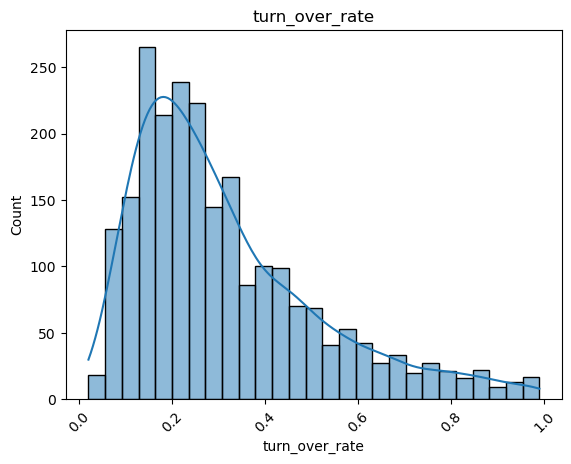

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.title('turn_over_rate')
plt.xticks(rotation = 45)
sns.histplot(df['turn_over_rate'],kde=True)
plt.show()

ValueError: could not convert string to float: '11.4억'

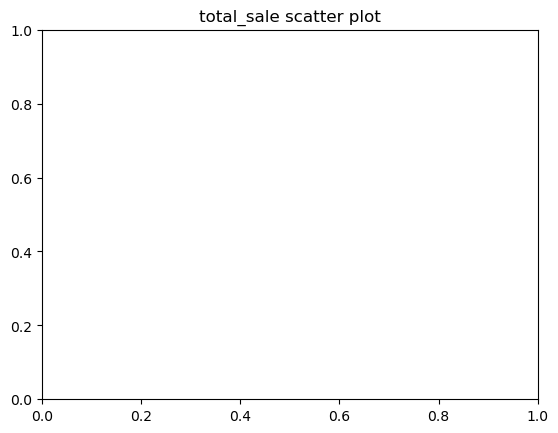

In [28]:
for i in df.columns:
    if i != 'company_name' and i != 'turn_over_rate':
        tmp = i + ' scatter plot'
        plt.title(tmp)
        # log_tor = np.log(df['turn_over_rate'].astype('float'))
        if i == 'total_sale':
            sns.scatterplot(x= df[i].astype(float), y = df['turn_over_rate'])
        else:
            sns.scatterplot(x= df[i], y = df['turn_over_rate'])
        plt.savefig(tmp+'.png')
        plt.cla()
        plt.clf()